In [46]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

In [47]:
class Type(Enum):
    SETOSA = 0
    VERSICOLOR = 1
    VIRGINICA = 2

In [48]:
def loadAndProcessData(file, type):
    dataframe = pd.read_csv(file)
    if type == Type.SETOSA:
        dataframe['y'] = dataframe['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)
    elif type == Type.VERSICOLOR:
        dataframe['y'] = dataframe['variety'].apply(lambda x: 1 if x == 'Versicolor' else 0)
    elif type == Type.VIRGINICA:
        dataframe['y'] = dataframe['variety'].apply(lambda x: 1 if x == 'Virginica' else 0)
    return dataframe

def loadAndProcessDataTriple(file):
    dataframe = pd.read_csv(file)
    dataframe['y1'] = dataframe['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)
    dataframe['y2'] = dataframe['variety'].apply(lambda x: 1 if x == 'Versicolor' else 0)
    dataframe['y3'] = dataframe['variety'].apply(lambda x: 1 if x == 'Virginica' else 0)
    return dataframe

In [49]:
def splitData(dataframe):
    x = dataframe[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
    y = dataframe['y']
    data = [None, None, None, None]
    data[0], data[1], data[2], data[3] = train_test_split(x, y, test_size=0.2)
    return data

In [50]:
def createModel(M):
    model = Sequential()
    model.add(Dense(M, activation='relu', input_dim=4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss="binary_crossentropy")
    return model

def createModelMulti(M):
    model = Sequential()
    if (len(M) == 1):
        model.add(Dense(M[0], activation='relu', input_dim=4))
    else:
        model.add(Dense(M[0], activation='relu', input_dim=4))
        for i in range(1, len(M)):
            model.add(Dense(M[i], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

def createModelMulti3out(M):
    model = Sequential()
    if (len(M) == 1):
        model.add(Dense(M[0], activation='relu', input_dim=4))
    else:
        model.add(Dense(M[0], activation='relu', input_dim=4))
        for i in range(1, len(M)):
            model.add(Dense(M[i], activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

def createModelMulti8in(M, activation):
    model = Sequential()
    if (len(M) == 1):
        model.add(Dense(M[0], activation=activation, input_dim=8))
    else:
        model.add(Dense(M[0], activation=activation, input_dim=8))
        for i in range(1, len(M)):
            model.add(Dense(M[i], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

In [51]:
def trainModel(model, x_train, y_train, epochs, batch_size, verbose):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return history

In [52]:
def showLoss(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

In [53]:
def calculateError(model, x, y):
    y_result = model.predict(x)
    y_result = np.round(y_result)
    errors = 0
    for i in range(len(y)):
        if y_result[i] != y[i]:
            errors += 1
    return errors

In [54]:
def singleNetwork(type, M, epochs, batch_size, verbose):
    dataframe = loadAndProcessData("iris.csv", type)
    data = splitData(dataframe)
    x_train = data[0].to_numpy()
    x_test = data[1].to_numpy()
    y_train = data[2].to_numpy()
    y_test = data[3].to_numpy()
    if type == Type.SETOSA:
        model = createModelMulti(M)
    elif type == Type.VERSICOLOR:
        model = createModelMulti(M)
    elif type == Type.VIRGINICA:
        model = createModelMulti(M)
    history = trainModel(model, x_train, y_train, epochs, batch_size, verbose)
    showLoss(history)

    trainError = calculateError(model, x_train, y_train)
    testError = calculateError(model, x_test, y_test)

    print("Liczba błędów na zbiorze treningowym: ", trainError)
    print("Procent błędów na zbiorze treningowym: ", trainError / len(y_train))
    print("Liczba błędów na zbiorze testowym: ", testError)
    print("Procent błędów na zbiorze testowym: ", testError / len(y_test))

Epoch 1/40
120/120 [==============================] - 1s 2ms/step - loss: 0.9837 - accuracy: 0.3667
Epoch 2/40
120/120 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.3667
Epoch 3/40
120/120 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.3000
Epoch 4/40
120/120 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.3833
Epoch 5/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6333
Epoch 6/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6333
Epoch 7/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6333
Epoch 8/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6333
Epoch 9/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.6333
Epoch 10/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6333

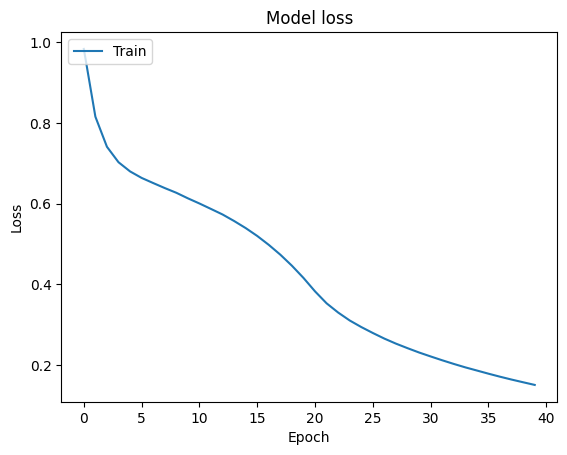

1/1 [==============================] - 0s 20ms/step
Liczba błędów na zbiorze treningowym:  0
Procent błędów na zbiorze treningowym:  0.0
Liczba błędów na zbiorze testowym:  0
Procent błędów na zbiorze testowym:  0.0


In [55]:
singleNetwork(Type.SETOSA, [1], 40, 1, 1)

Epoch 1/60
120/120 [==============================] - 1s 1ms/step - loss: 0.7698 - accuracy: 0.6833
Epoch 2/60
120/120 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6833
Epoch 3/60
120/120 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.6833
Epoch 4/60
120/120 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.6833
Epoch 5/60
120/120 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.6833
Epoch 6/60
120/120 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.6833
Epoch 7/60
120/120 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.6833
Epoch 8/60
120/120 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.6833
Epoch 9/60
120/120 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.6833
Epoch 10/60
120/120 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.6833

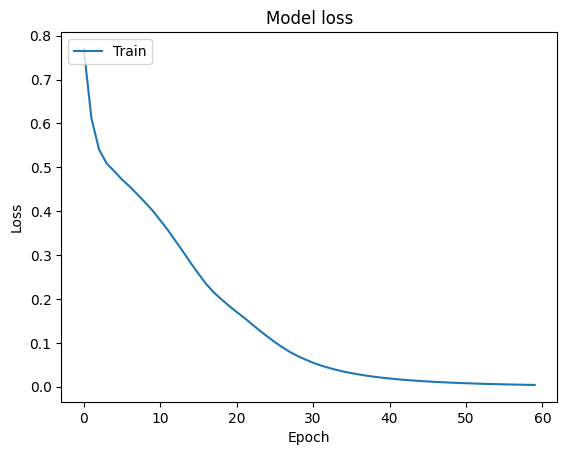

1/1 [==============================] - 0s 44ms/step
Liczba błędów na zbiorze treningowym:  0
Procent błędów na zbiorze treningowym:  0.0
Liczba błędów na zbiorze testowym:  0
Procent błędów na zbiorze testowym:  0.0


In [56]:
singleNetwork(Type.SETOSA, [2], 60, 1, 1)

Epoch 1/40
60/60 [==============================] - 1s 2ms/step - loss: 5.1425 - accuracy: 0.3500
Epoch 2/40
60/60 [==============================] - 0s 2ms/step - loss: 4.0893 - accuracy: 0.3500
Epoch 3/40
60/60 [==============================] - 0s 1ms/step - loss: 3.3230 - accuracy: 0.3500
Epoch 4/40
60/60 [==============================] - 0s 1ms/step - loss: 2.6868 - accuracy: 0.3500
Epoch 5/40
60/60 [==============================] - 0s 1ms/step - loss: 2.1553 - accuracy: 0.3500
Epoch 6/40
60/60 [==============================] - 0s 1ms/step - loss: 1.7157 - accuracy: 0.3500
Epoch 7/40
60/60 [==============================] - 0s 1ms/step - loss: 1.3549 - accuracy: 0.3500
Epoch 8/40
60/60 [==============================] - 0s 1ms/step - loss: 1.0728 - accuracy: 0.3500
Epoch 9/40
60/60 [==============================] - 0s 1ms/step - loss: 0.8560 - accuracy: 0.3500
Epoch 10/40
60/60 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.3500
Epoch 11/40
60/60 [

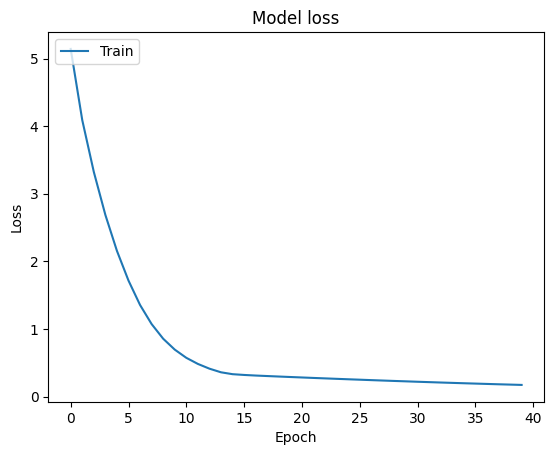

1/1 [==============================] - 0s 20ms/step
Liczba błędów na zbiorze treningowym:  0
Procent błędów na zbiorze treningowym:  0.0
Liczba błędów na zbiorze testowym:  0
Procent błędów na zbiorze testowym:  0.0


In [57]:
singleNetwork(Type.SETOSA, [3], 40, 2, 1)

Epoch 1/40
120/120 [==============================] - 1s 2ms/step - loss: 2.3300 - accuracy: 0.3417
Epoch 2/40
120/120 [==============================] - 0s 1ms/step - loss: 1.4255 - accuracy: 0.3417
Epoch 3/40
120/120 [==============================] - 0s 1ms/step - loss: 1.0283 - accuracy: 0.3417
Epoch 4/40
120/120 [==============================] - 0s 1ms/step - loss: 0.8520 - accuracy: 0.3417
Epoch 5/40
120/120 [==============================] - 0s 1ms/step - loss: 0.7608 - accuracy: 0.3417
Epoch 6/40
120/120 [==============================] - 0s 1ms/step - loss: 0.7100 - accuracy: 0.3750
Epoch 7/40
120/120 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6500
Epoch 8/40
120/120 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6583
Epoch 9/40
120/120 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6583
Epoch 10/40
120/120 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6583

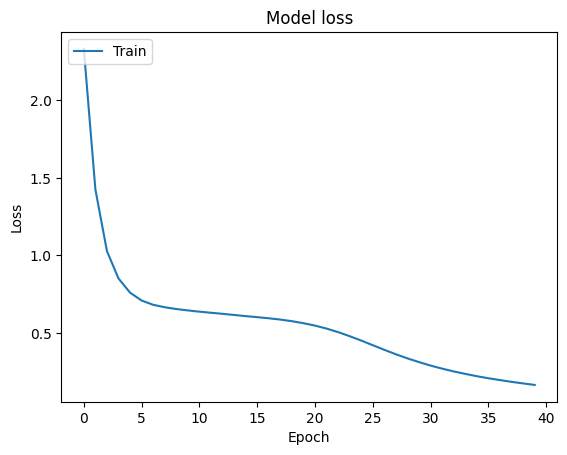

1/1 [==============================] - 0s 36ms/step
Liczba błędów na zbiorze treningowym:  0
Procent błędów na zbiorze treningowym:  0.0
Liczba błędów na zbiorze testowym:  0
Procent błędów na zbiorze testowym:  0.0


In [58]:
singleNetwork(Type.SETOSA, [2,2], 40, 1, 1)

Epoch 1/300
60/60 [==============================] - 1s 3ms/step - loss: 0.9519 - accuracy: 0.3250
Epoch 2/300
60/60 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.6417
Epoch 3/300
60/60 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.6750
Epoch 4/300
60/60 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.6750
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6750
Epoch 6/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.6750
Epoch 7/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6750
Epoch 8/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6750
Epoch 9/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6750
Epoch 10/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.6750
Epoch 11/

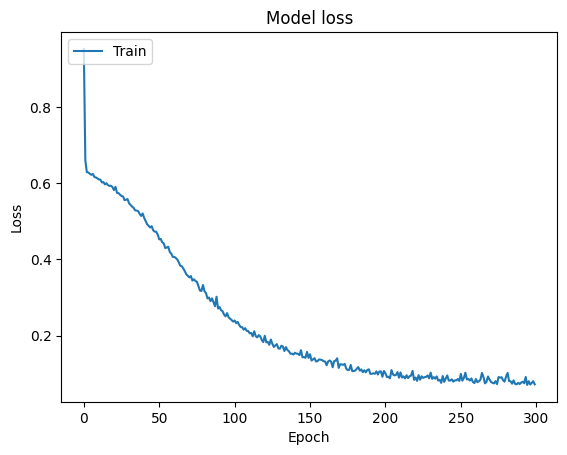

1/1 [==============================] - 0s 44ms/step
Liczba błędów na zbiorze treningowym:  3
Procent błędów na zbiorze treningowym:  0.025
Liczba błędów na zbiorze testowym:  0
Procent błędów na zbiorze testowym:  0.0


In [59]:
singleNetwork(Type.VERSICOLOR, [8,8], 300, 2, 1)

Epoch 1/300
30/30 [==============================] - 1s 1ms/step - loss: 2.2140 - accuracy: 0.3167 
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 1.5056 - accuracy: 0.3167
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 1.0921 - accuracy: 0.3167
Epoch 4/300
30/30 [==============================] - 0s 1ms/step - loss: 0.8696 - accuracy: 0.3417
Epoch 5/300
30/30 [==============================] - 0s 1ms/step - loss: 0.7679 - accuracy: 0.3667
Epoch 6/300
30/30 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4583
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6583
Epoch 8/300
30/30 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6833
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.6833
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.6833
Epoch 11

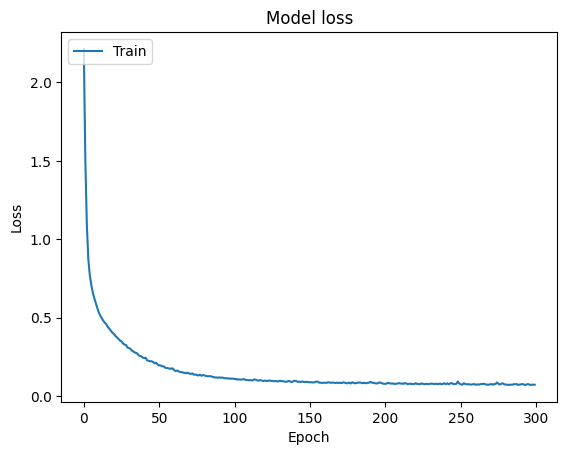

1/1 [==============================] - 0s 20ms/step
Liczba błędów na zbiorze treningowym:  2
Procent błędów na zbiorze treningowym:  0.016666666666666666
Liczba błędów na zbiorze testowym:  0
Procent błędów na zbiorze testowym:  0.0


In [60]:
singleNetwork(Type.VIRGINICA, [10, 10], 300, 4, 1)

Epoch 1/300
30/30 [==============================] - 2s 3ms/step - loss: 0.6637 - accuracy: 0.4500
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6333
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.6333
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.6333
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.6333
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8417
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7833
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8000
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8250
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8417
Epoch 11/

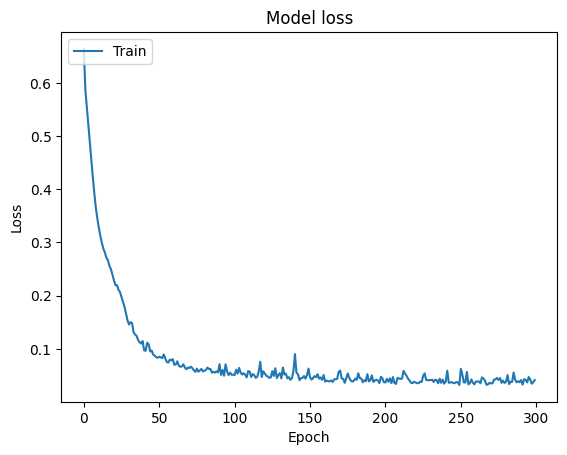

1/1 [==============================] - 0s 28ms/step
Liczba błędów na zbiorze treningowym:  2
Procent błędów na zbiorze treningowym:  0.016666666666666666
Liczba błędów na zbiorze testowym:  2
Procent błędów na zbiorze testowym:  0.06666666666666667


In [63]:
# dataframe = pd.read_csv("iris.csv")
# dataframe['y1'] = dataframe['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)
# dataframe['y2'] = dataframe['variety'].apply(lambda x: 1 if x == 'Versicolor' else 0)
# dataframe['y3'] = dataframe['variety'].apply(lambda x: 1 if x == 'Virginica' else 0)
dataframe = loadAndProcessDataTriple("iris.csv")

x = dataframe[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = dataframe[['y1', 'y2', 'y3']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

model = createModelMulti3out([8, 8, 8])

history = trainModel(model, x_train, y_train, 300, 4, 1)
showLoss(history)

y_train_result = model.predict(x_train)
y_train_result = np.round(y_train_result)
errors = 0
for i in range(len(y_train)):
    if not np.array_equal(y_train_result[i], y_train[i]):
        errors += 1

y_result = model.predict(x_test)
y_result = np.round(y_result)
errors = 0
for i in range(len(y_test)):
    if not np.array_equal(y_result[i], y_test[i]):
        errors += 1

print("Liczba błędów na zbiorze treningowym: ", errors)
print("Procent błędów na zbiorze treningowym: ", errors / len(y_train))

print("Liczba błędów na zbiorze testowym: ", errors)
print("Procent błędów na zbiorze testowym: ", errors / len(y_test))

Epoch 1/1000
77/77 [==============================] - 1s 2ms/step - loss: 1.5918 - accuracy: 0.5749
Epoch 2/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.6743
Epoch 3/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.6808
Epoch 4/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6889
Epoch 5/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6840
Epoch 6/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6987
Epoch 7/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6971
Epoch 8/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6922
Epoch 9/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7068
Epoch 10/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7313

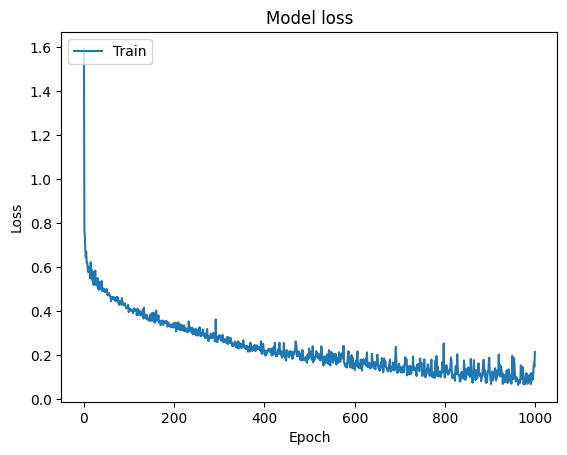

5/5 [==============================] - 0s 2ms/step
Liczba błędów na zbiorze treningowym:  23
Procent błędów na zbiorze treningowym:  0.03745928338762215
Liczba błędów na zbiorze testowym:  53
Procent błędów na zbiorze testowym:  0.34415584415584416


In [62]:
dataframe = pd.read_csv("pid.csv")
x = dataframe[['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree_function','age']]
y = dataframe[['class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# model = Sequential()
# model.add(Dense(15, activation='tanh', input_dim=8))
# model.add(Dense(15, activation='tanh'))
# model.add(Dense(15, activation='sigmoid'))
# model.add(Dense(15, activation='sigmoid'))
# model.add(Dense(15, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model = createModelMulti8in([20, 20, 20], 'relu')

# history = model.fit(x_train, y_train, epochs=2000, batch_size=8, verbose=1)

# plt.plot(history.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train'], loc='upper left')
# plt.show()

history = trainModel(model, x_train, y_train, 1000, 8, 1)
showLoss(history)

train_errors = calculateError(model, x_train, y_train)
test_errors = calculateError(model, x_test, y_test)
print("Liczba błędów na zbiorze treningowym: ", train_errors)
print("Procent błędów na zbiorze treningowym: ", train_errors / len(y_train))

print("Liczba błędów na zbiorze testowym: ", test_errors)
print("Procent błędów na zbiorze testowym: ", test_errors / len(y_test))